In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
path='/content/gdrive/MyDrive/Machine Learning/KNN/film_recommendation/movie.csv'

data=pd.read_csv(path)
print(data.describe)

<bound method NDFrame.describe of      Unnamed: 0                           name  ... vote_counts  vote_averages
0             0                      Toy Story  ...      5415.0            7.7
1             1                        Jumanji  ...      2413.0            6.9
2             2               Grumpier Old Men  ...        92.0            6.5
3             3              Waiting to Exhale  ...        34.0            6.1
4             4    Father of the Bride Part II  ...       173.0            5.7
..          ...                            ...  ...         ...            ...
995         995           The Three Caballeros  ...       108.0            6.2
996         996         The Sword in the Stone  ...       935.0            6.9
997         997            So Dear to My Heart  ...         5.0            6.3
998         998  Robin Hood: Prince of Thieves  ...       937.0            6.6
999         999                   Mary Poppins  ...      1217.0            7.4

[1000 rows x 9 co

# GENRES 
- Okey, let's begin with genres. Quite tough, isn't it?:v. I wanna finish 3 things:
  - Get all type of movies, and the number of each type existing in the data
  - Encoding genre data for each film
  - Visualizing ...
  

Total genres:  21
Set of genres: dict_keys(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'ScienceFiction', 'Mystery', 'War', 'Foreign', '', 'Music', 'Documentary', 'Western', 'TVMovie'])


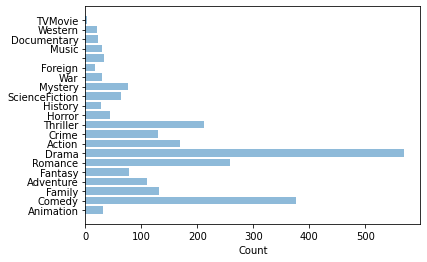

[[1 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


In [4]:

data['genres'] = data['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
genres=data['genres'].values


all_gen=[]
for x in genres:
  all_gen.append(x.split(","))

all_gen_1D=[y for x in all_gen for y in x]

my_dict = {i:all_gen_1D.count(i) for i in all_gen_1D}
gen_num=len(my_dict)
print("Total genres: ",len(my_dict))

#-------------------------------------------------------------------------------------------

genre = my_dict.keys()
count = my_dict.values()
print("Set of genres:", genre)
plt.barh(np.arange(gen_num), count, align='center', alpha=0.5)
plt.yticks(np.arange(gen_num), genre)
plt.xlabel('Count')
plt.show()

#-------------------------------------------------------------------------------------------
encoding_genres=[]

for x in all_gen:
  y=[0]*gen_num
  for i in range (gen_num):
    if (list(genre))[i] in x:
      y[i]=1  
  encoding_genres.append(y)

encoding_genres=np.asarray(encoding_genres)

print(encoding_genres)


# REVENUE

- Hmmm, I see some missed data and that, is tough as well :). In this part, I wanna do these:
  - Showing the relationship between Revenue, popularity and vote average
  - Addressing missed data



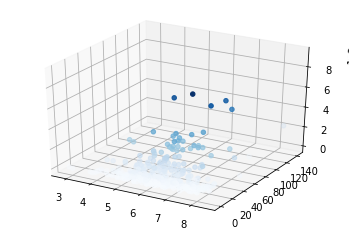

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
data_=data[ data['revenue'] > 100000] # haizz, I cant believe that there's are values == 1?
# remove some outliers
#data_ = data_[ data_['popularity'] <= 50]
zdata = data_['revenue'].to_numpy()
ydata = data_['popularity'].to_numpy()
xdata = data_['vote_averages'].to_numpy()
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues')
plt.show()

Hmmm:v Okey let's see ...

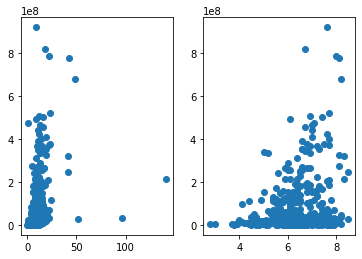

In [6]:
plt.subplot(1,2,1)
plt.scatter(ydata,zdata)
plt.subplot(1,2,2)
plt.scatter(xdata,zdata)
plt.show()


In [ ]:

# df = pd.DataFrame()
# df['revenue']= zdata
# df['popularity']=ydata
# df['vote_averages']=xdata
# print(df)


# def minmax_scaler(revenue):
#   min=np.min(revenue)
#   max=np.max(revenue)
#   revenue_=[(x-min)/(max-min) for x in revenue]
#   return revenue_

# y_train=np.array(minmax_scaler(zdata))
# X_train=df.iloc[:,1:].to_numpy()

# df_test=data[data['revenue']<=100000]
# print(df_test)

# Problems
- Well, I'm speechless, it was absolutely a stupid data collection. I meant,here is the thing: 

  - Why 'revenue' and 'budget' are important, instead of getting things like 'actors' or 'year of production' which are much more related to the movie recommendation sys here?.

  - It can't go without saying that, there two much missing and even ridiculous data in this dataset

In [7]:
# Okey, just calm down:v
print(list(genre))
# Start with dropping some:v
data_=data.drop(columns=['revenue', 'budget','Unnamed: 0','genres'])
for x in reversed(encoding_genres):  # well, I dont know wat to say:))
  for i in range(len(x)):
    data_[ list(genre)[i] ] = x[i]



['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'ScienceFiction', 'Mystery', 'War', 'Foreign', '', 'Music', 'Documentary', 'Western', 'TVMovie']


In [8]:

data_.to_csv('data_after.csv')
!cp data_after.csv '/content/gdrive/MyDrive/Machine Learning/KNN/film_recommendation/'

import json

with open('/content/gdrive/MyDrive/Machine Learning/KNN/film_recommendation/genres.json', "w") as f:
    json.dump(my_dict, f, indent=4)
